In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
GDP1=pd.read_excel(r"C:\Users\iT HOME\PycharmProjects\GDP project file\GDP after dummies.xlsx")
GDP1.head()

,Unnamed: 0,Population,Area (sq. km.),Pop. Density (per sq. km.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Country_id
0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,0,0,0,0,0,0,0,0,0,0
1,1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,0,1,0,0,0,0,0,0,0,1
2,2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,0,0,0,0,1,0,0,0,0,2
3,3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,0,0,0,0,0,0,1,0,0,3
4,4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,0,0,0,0,0,0,0,0,1,4


In [3]:
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    return mae, mse, rmse, r2_square

In [4]:
y = GDP1['GDP ($ per capita)']
X = GDP1.drop(['GDP ($ per capita)'], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,shuffle=True)

In [6]:
rid1 = Ridge(alpha=1)
rid1.fit(X_train,y_train)

C:\Users\iT HOME\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.07003e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=1)

In [7]:
rid1_pred = rid1.predict(X_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=rid1_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,351.580267
54,31100.000000,28459.448790
185,13300.000000,9358.919107
80,20000.000000,15720.444291
33,600.000000,-1353.705532
201,7400.000000,8012.912002
37,1400.000000,5652.190699
218,4800.000000,6733.808803
199,1000.000000,-2277.458469
66,22000.000000,23661.924400


In [8]:
print('Ridge regresssion Performance:')

print('\nall features, No scaling:')
accuracy=rid1.score(X_test,y_test)
train=rid1.score(X_train,y_train) 
results_df = pd.DataFrame(data=[["ridge Regression perfromance",*evaluate(y_test, rid1_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Ridge regresssion Performance:

all features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,ridge Regression perfromance,4614.805798,8.292859e+07,9106.513862,-0.015847,0.809585,-0.015847


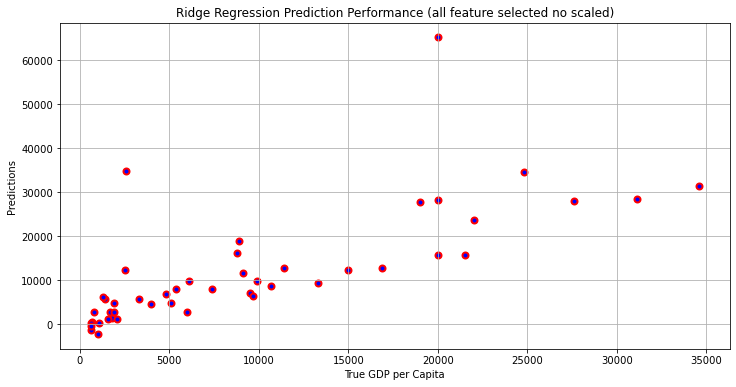

In [9]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rid1_pred,color='blue', linewidths=2, edgecolors='red')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Ridge Regression Prediction Performance (all feature selected no scaled)') 
plt.grid()
plt.show()

In [10]:
sc_X = StandardScaler()
X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [11]:
rid2 = Ridge(alpha=1)
rid2.fit(X2_train,y2_train)

Ridge(alpha=1)

In [12]:
rid2_pred = rid2.predict(X2_test)
dfff = pd.DataFrame(data=y2_test)
df9 = pd.DataFrame(data=rid2_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,-1749.285048
54,31100.000000,27582.639857
185,13300.000000,9314.304370
80,20000.000000,15711.413198
33,600.000000,-2514.613477
201,7400.000000,7307.725798
37,1400.000000,5756.611255
218,4800.000000,6781.299586
199,1000.000000,-1491.320722
66,22000.000000,22011.444666


In [13]:
print('Ridge regresssion Performance:')
print('\nall features, with scaling:')
accuracy=rid2.score(X2_test,y2_test)
train=rid2.score(X2_train,y2_train) 
results_df = pd.DataFrame(data=[["ridge Regression perfromance",*evaluate(y2_test, rid2_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Ridge regresssion Performance:

all features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,ridge Regression perfromance,3157.53157,1.635852e+07,4044.566337,0.799614,0.810744,0.799614


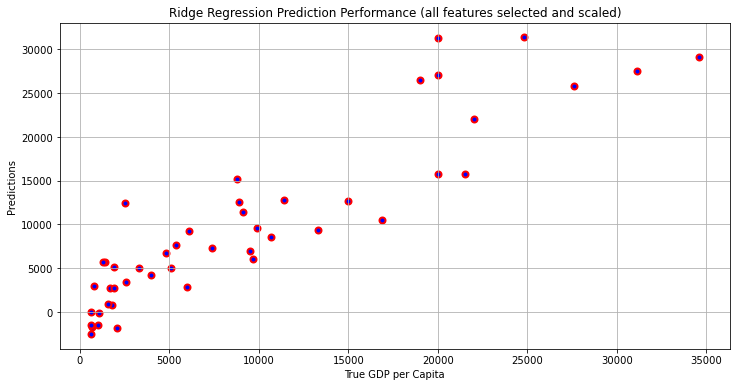

In [14]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,rid2_pred,color='blue', linewidths=2, edgecolors='red')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Ridge Regression Prediction Performance (all features selected and scaled)') 
plt.grid()
plt.show()

In [15]:
y3 = y
X3 = GDP1.drop(['GDP ($ per capita)','Population', 'Area (sq. km.)', 'Arable (%)','Crops (%)',
                        'Climate',"Agriculture"], axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101,shuffle=True)

In [16]:
rid3 = Ridge(alpha=1)
rid3.fit(X3_train,y3_train)

Ridge(alpha=1)

In [17]:
rid3_pred = rid3.predict(X3_test)
dfff = pd.DataFrame(data=y3_test)
df9 = pd.DataFrame(data=rid3_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,666.466048
54,31100.000000,27547.416228
185,13300.000000,8793.305183
80,20000.000000,16952.526580
33,600.000000,-1007.862086
201,7400.000000,7366.254273
37,1400.000000,5187.493837
218,4800.000000,6399.906090
199,1000.000000,-2396.810415
66,22000.000000,25414.898887


In [18]:
print('Ridge regresssion Performance:')
print('\nselected features, No scaling:')
accuracy=rid3.score(X3_test,y3_test)
train=rid3.score(X3_train,y3_train) 
results_df = pd.DataFrame(data=[["ridge Regression perfromance",*evaluate(y_test, rid3_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Ridge regresssion Performance:

selected features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,ridge Regression perfromance,3052.504981,1.709162e+07,4134.201491,0.790634,0.801629,0.790634


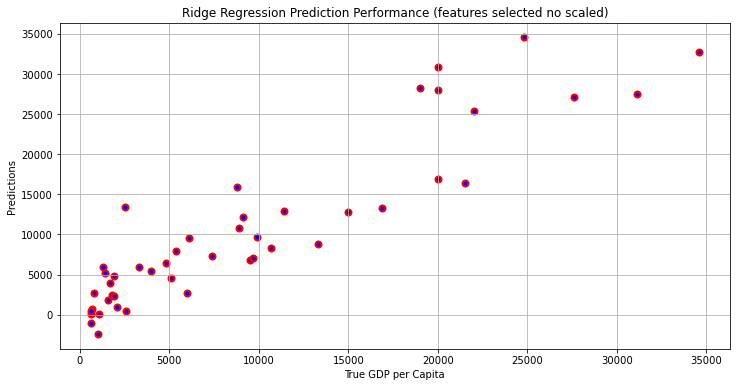

In [19]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,rid3_pred,color='blue', linewidths=2, edgecolors='red')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Ridge Regression Prediction Performance (features selected no scaled)') 
plt.grid()
plt.show()

In [20]:
sc_X4 = StandardScaler()
X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

In [21]:
rid4 = Ridge(alpha=1)
rid4.fit(X4_train,y4_train)

Ridge(alpha=1)

In [22]:
rid4_pred = rid4.predict(X4_test)
dfff = pd.DataFrame(data=y4_test)
df9 = pd.DataFrame(data=rid4_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,-462.147278
54,31100.000000,26892.239460
185,13300.000000,9026.428474
80,20000.000000,17191.402946
33,600.000000,-2622.671053
201,7400.000000,7794.879231
37,1400.000000,4966.933788
218,4800.000000,6958.347411
199,1000.000000,-1592.474336
66,22000.000000,22578.595129


In [23]:
print('Ridge regresssion Performance:')
print('\nselected features, with scaling:')
accuracy=rid4.score(X4_test,y4_test)
train=rid4.score(X4_train,y4_train) 
results_df = pd.DataFrame(data=[["ridge Regression perfromance",*evaluate(y_test, rid4_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Ridge regresssion Performance:

selected features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,ridge Regression perfromance,2890.738376,1.396657e+07,3737.187654,0.828914,0.804427,0.828914


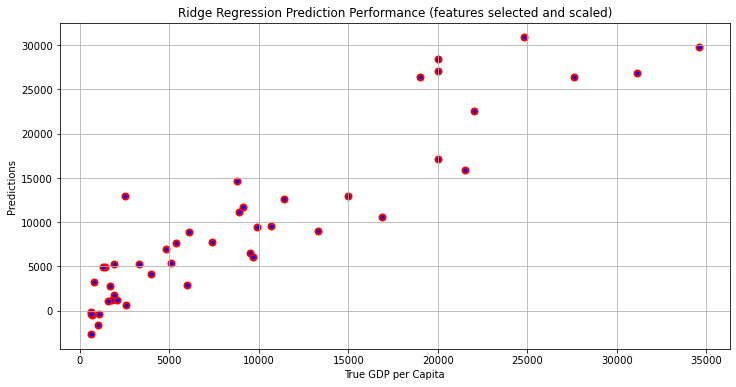

In [24]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,rid4_pred,color='blue', linewidths=2, edgecolors='red')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Ridge Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()